## Why: In the United States, approximately 40% of people will be diagnosed with cancer at some point in their lives. In my life I have lost my godfather and stepmother to cancer over  the last ten years. My motivation is to explore if there are factors that are associated with higher risks for cancer. 

# Why Lung Cancer?


# Lung cancer remains the most commonly diagnosed cancer in the United States. Males are generally at a higher lifetime risk of developing lung cancer. 



# Source: National Libarary of Medicine 'Sex Differences in Lung Cancer' May L, Shows K, Nana-Sinkam P, Li H, Landry JW. Sex Differences in Lung Cancer. Cancers (Basel). 2023 Jun 8;15(12):3111. doi: 10.3390/cancers15123111. PMID: 37370722; PMCID: PMC10296433.

## The data. I managed to find this dataset on kaggle Lung cancer dataset 

In [1]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [118]:
from collections import Counter

In [3]:
df = pd.read_excel('cancer patient data sets.xlsx')

In [4]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
#Checking for missing values
Na_count = df.isna().sum()
Na_count

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [9]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

## What do the Cancer Level distribution rates look like for this dataset?

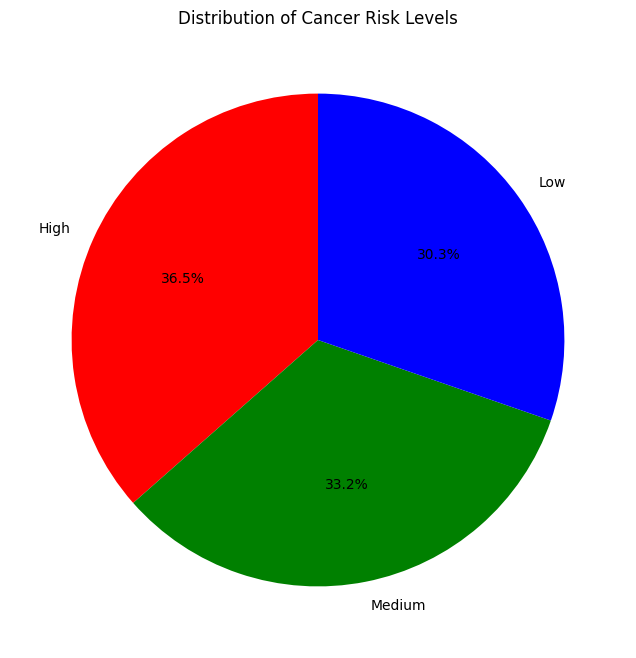

In [116]:

# Count the occurrences of each level
level_counts = df['Level'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])

# Adding a title
plt.title('Distribution of Cancer Risk Levels')
plt.show()

## Is age a major factor in cancer Levels?

In [10]:
df['Age'].value_counts()

Age
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: count, dtype: int64

In [11]:
df['Age'].mean()

37.174

In [12]:
age_counts = Counter(df['Age'])
unique_ages = list(age_counts.keys())
counts = list(age_counts.values())

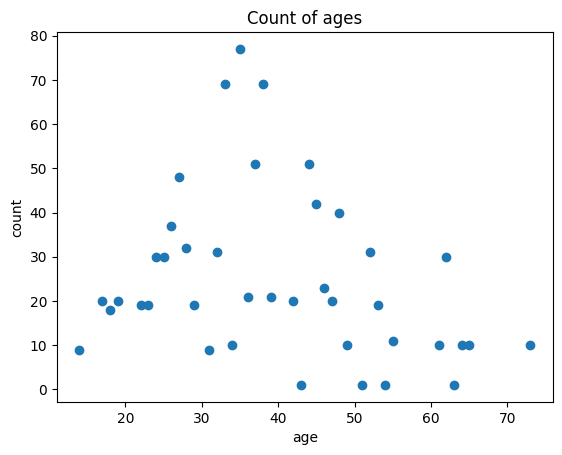

In [13]:
counts = list(age_counts.values())

plt.scatter(unique_ages, counts)

plt.xlabel('age')

plt.ylabel('count')

plt.title('Count of ages')

plt.show()

In [14]:
mean_ = np.mean(df['Age'])
std_ = np.std(df['Age'])
median_ = np.median(df['Age'])

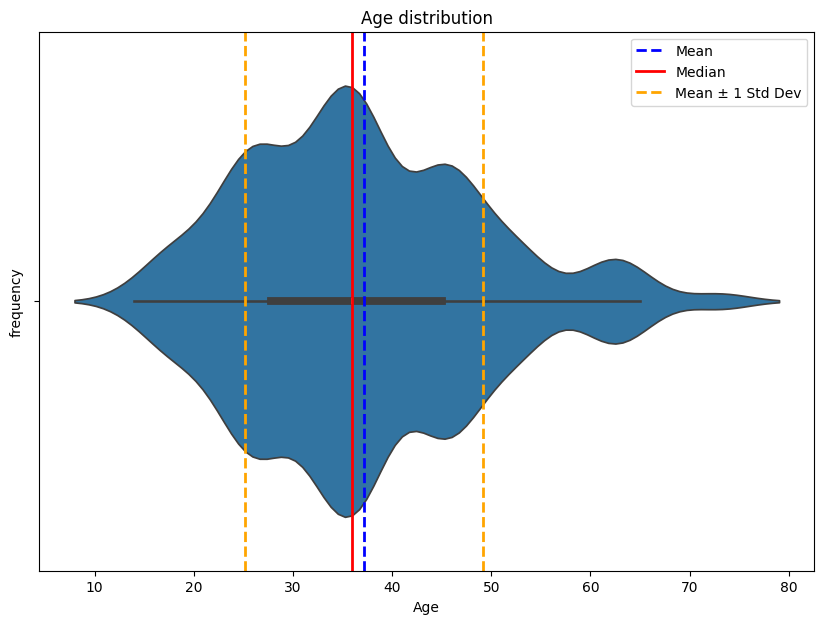

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

sns.violinplot(x='Age', data=df, ax=ax)

#Lable axis

ax.set_xlabel('Age')
ax.set_ylabel('frequency')
ax.set_title('Age distribution')

ax.axvline(mean_, color='blue', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(median_, color='red', linestyle='solid', linewidth=2, label='Median')
ax.axvline(mean_ + std_, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
ax.axvline(mean_ - std_, color='orange', linestyle='dashed', linewidth=2)

ax.legend()
plt.show()

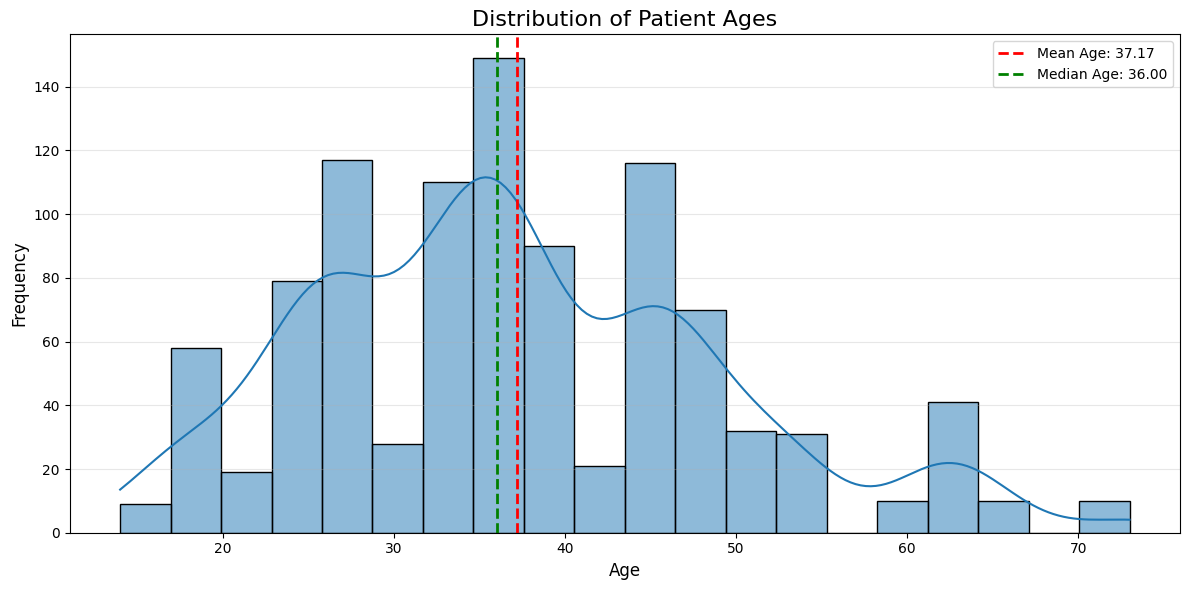

In [112]:


plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data=df, x='Age', bins=20, kde=True)

# Customize the plot
plt.title('Distribution of Patient Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add mean age line
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

# Add median age line
median_age = df['Age'].median()
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')

# Add legend
plt.legend(fontsize=10)

# Show grid
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

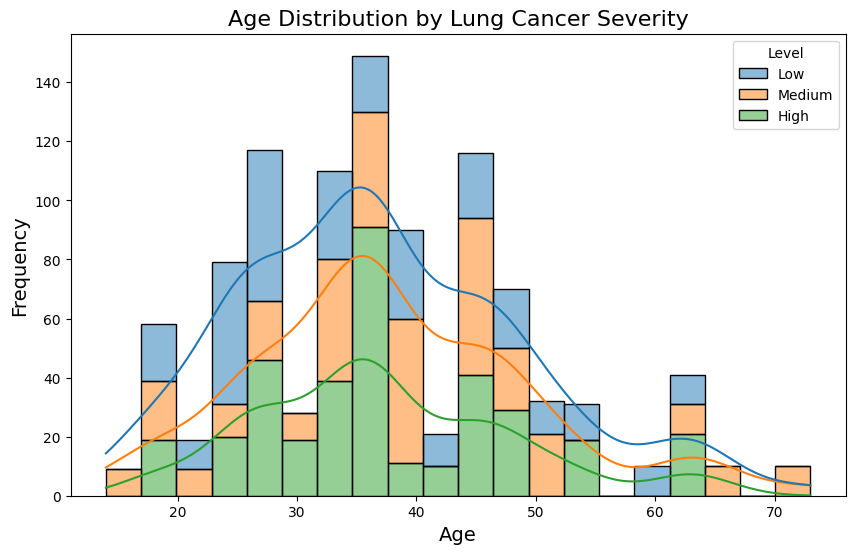

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Level', multiple='stack', bins=20, kde=True)

plt.title('Age Distribution by Lung Cancer Severity', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


## Does Gender affect cancer levels or cancer rates?

## Issue: The data set does not explicitly state if males are numerically catoegrized as 1 or 2.

In [54]:
df['Gender'].value_counts()

Gender
1    598
2    402
Name: count, dtype: int64

In [55]:
#Calculate probability based on gender

print(598/1000)

0.598


In [56]:
print(402/1000)

0.402


## Assumption: Since statistically speaking Men are more likely to develop lung cancer I will assume that in this dataset Male is represented by 1 and female by 2.

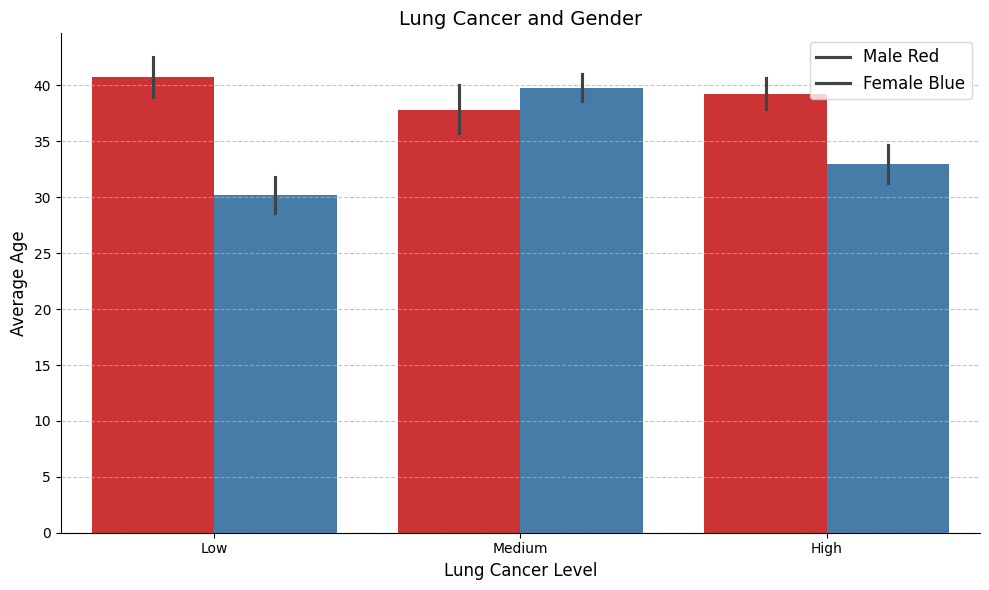

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure size
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=df,
            x='Level',
            y='Age',
            hue='Gender',
            palette='Set1')

# labels and title
plt.xlabel('Lung Cancer Level', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Lung Cancer and Gender', fontsize=14)

# Remove top and right spines
sns.despine()

# legend
plt.legend(labels=['Male Red','Female Blue'],fontsize=12)

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

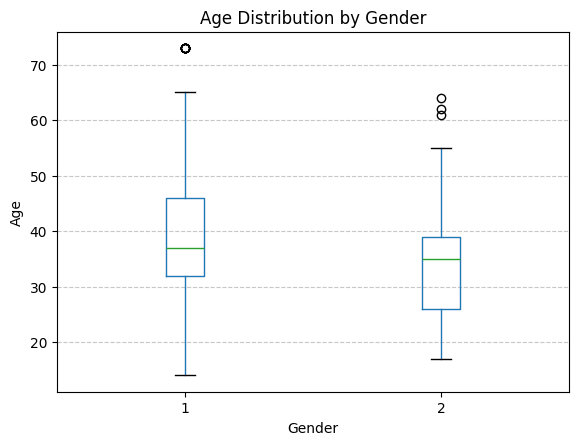

In [71]:
# Plotting boxplot
plt.figure(figsize=(10, 8))
df.boxplot(column='Age', by='Gender', grid=False)

# Adding labels and title
plt.title('Age Distribution by Gender')
plt.suptitle('')  # Suppresses the default title to make the plot cleaner
plt.xlabel('Gender')
plt.ylabel('Age')
# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
grouped = df.groupby('Level')['Age']

In [19]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Level,,,,,,,,
High,365.0,37.320548,10.724253,18.0,29.0,36.0,44.0,64.0
Low,303.0,35.412541,12.126736,17.0,25.0,33.0,44.0,62.0
Medium,332.0,38.620482,13.015234,14.0,32.0,38.0,46.0,73.0


<Figure size 800x600 with 0 Axes>

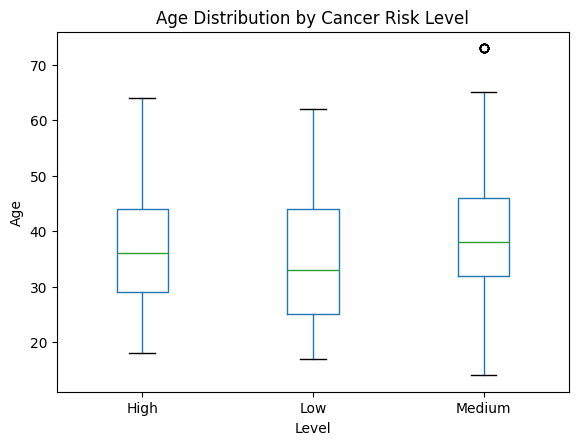

In [67]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Level', grid=False)

# Adding labels and title
plt.title('Age Distribution by Cancer Risk Level')
plt.suptitle('')  # Suppresses the default title to make the plot cleaner
plt.xlabel('Level')
plt.ylabel('Age')
plt.show()

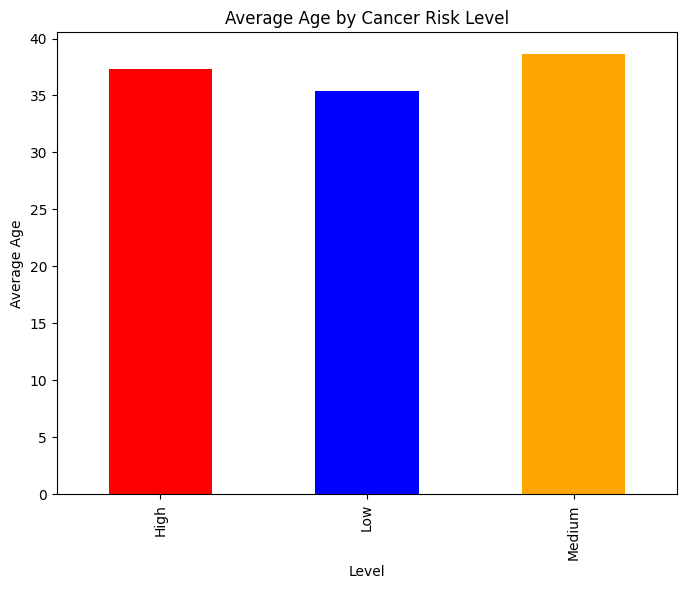

In [21]:
# Bar plot for average age in each level
avg_age = df.groupby('Level')['Age'].mean()

plt.figure(figsize=(8, 6))
avg_age.plot(kind='bar', color = ['red','blue','orange'])

# Adding labels and title
plt.title('Average Age by Cancer Risk Level')
plt.xlabel('Level')
plt.ylabel('Average Age')
plt.show()


In [117]:
df['Balanced Diet'].head()

0    2
1    2
2    6
3    7
4    7
Name: Balanced Diet, dtype: int64

## Encoding Levels using ordinal_encoder 

In [119]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_column = ['Level']




df_encoded = df.copy()
#OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#Ordinal column Level 
df_encoded[ordinal_column] = ordinal_encoder.fit_transform(df_encoded[ordinal_column])


In [24]:
df_encoded.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1.0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2.0
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0.0
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0.0
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0.0


In [25]:
df_encoded.drop(columns='Patient Id', inplace=True)

In [26]:
#Calculate the Correlation Matrix
correlation_matrix = df_encoded.corr()

In [27]:
print(correlation_matrix)

                               Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain  

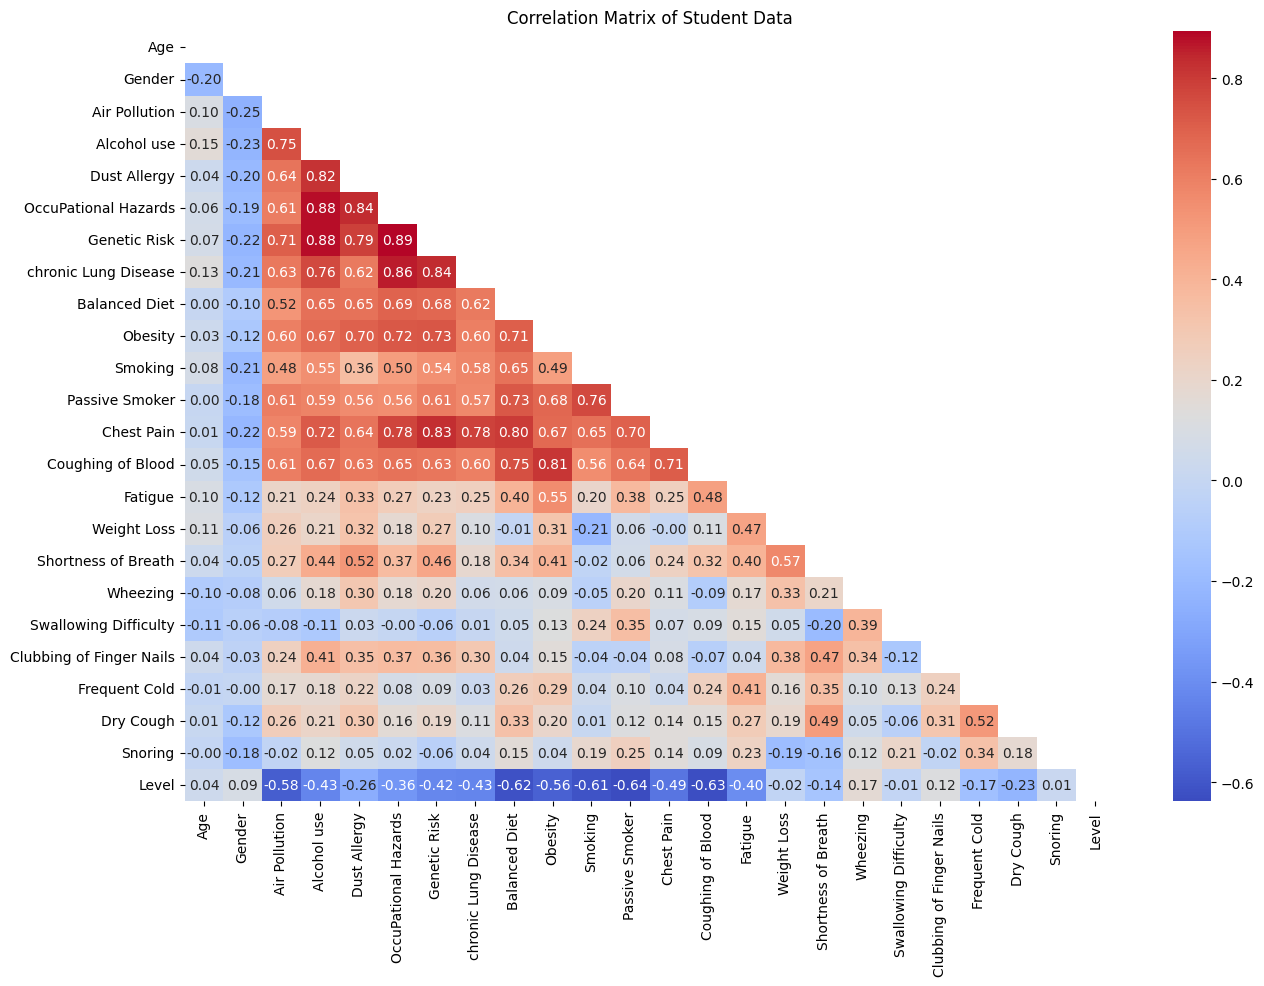

In [28]:
#Plot the Correlation Matrix
plt.figure(figsize=(15, 10))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Student Data')

plt.show()

# Trends based on Correlation Matrix:

Zero Correlation, no linear relationship between the variables.

## 1) Postitive Correlations (as one variable increases so does the other): 
- Occupational Hazard and Alchohol Use at .88 
- Occupational Hazards and Genetic Risks at .89 
- Occupational Hazard and Chronic Lung disease .86 
- Genetic Risk and Chronic Lung disease .84 
- Coughing Blood and Obesity .81 
- Chronic Lung Disease and Alchol Use .76


## 2) Negative Correlations (as one variable increases the other decreases): 

- Cancer Level and Passive Smoker levels with -0.64
- Cancer Level and Coughing Blood with -0.63
- Cancer level and Balanced Diet with -0.62
- Cancer level and Obesity with -0.56
- Cancer level and Air polution with -0.58
- Cancer level and Alcohol use with -0.43

# Summary of correlation matrix trends:

## Factors which can be controled for 

## Train_Test_Split

In [31]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_encoded .drop(columns=['Level'])
y = df_encoded ['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model: Here I chose an Ordinal Logistic Regression model, however I will also try Random Forest, Multinominal Logistic Regression and gradient boosting 

Reasoning: OLR maintains the integrity of the order. Since the Level are split into 'Low','Medium' and 'High' this order must be taken into account differences between these three Levels of cancer.

In [47]:
# Fit an ordinal logistic regression model
model = OrderedModel(y_train, X_train, distr='logit')
result = model.fit(method='lbfgs', maxiter=100, disp=False)
# Print the summary of the model
print(result.summary())

# Now you can use the model to predict on the test set
y_pred = result.predict(X_test)

                             OrderedModel Results                             
Dep. Variable:                  Level   Log-Likelihood:                -342.82
Model:                   OrderedModel   AIC:                             735.6
Method:            Maximum Likelihood   BIC:                             851.1
Date:                Sat, 19 Oct 2024                                         
Time:                        11:36:28                                         
No. Observations:                 750                                         
Df Residuals:                     725                                         
Df Model:                          23                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.0684      0.011      6.276      0.000       0.047       0.090
Gender    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
print(y_pred)

            0         1         2
866  0.235924  0.729596  0.034480
191  0.000180  0.015855  0.983965
732  0.001782  0.137526  0.860692
657  0.928227  0.070921  0.000852
155  0.061625  0.794610  0.143765
..        ...       ...       ...
386  0.028379  0.697565  0.274055
334  0.000078  0.006957  0.992965
731  0.002544  0.185335  0.812121
962  0.005011  0.308521  0.686468
483  0.011977  0.511687  0.476336

[250 rows x 3 columns]


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_prob = result.predict(X_test) #Classification metrics can't handel a mix of multiclass and continuous-multioutput targets, need to convert prob into class labels 


y_pred = np.argmax(y_pred_prob, axis=1)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.848
Confusion Matrix:
[[81 14  0]
 [ 8 55  4]
 [ 5  7 76]]


## Model Performance Reflection:

Model was biased. It favored misclassifying categories as 'Medium'. After adding these arguments the Accuracy jumped from 38% to 84.4% (method='lbfgs', maxiter=100, disp=False).

In [50]:
#Checking for balance in dataset. 

print(y_train.value_counts())


Level
0.0    270
2.0    244
1.0    236
Name: count, dtype: int64


In [41]:
#from sklearn.model_selection import train_test_split

#X = df_encoded.drop(['Level'], axis=1) #dropping target variables 
#y = df_encoded['Level']



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

## Logistic Regression Model: 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
#Instantiate the model: I am using multi_class='multinomial' since my classification is multiclass. solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine.
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=22)


#fit the model
logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#Check model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.992
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       0.97      1.00      0.99        67
         2.0       1.00      0.98      0.99        88

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [41]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  2 86]]


## Check for Overfitting

In [73]:
# Check training accuracy
y_train_pred = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.996


In [74]:
# Check training accuracy
y_train = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already know the test accuracy
print(f"Test Accuracy: {accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.848


Model is Overfitting

In [77]:
#Instantiate the model: I am using multi_class='multinomial' since my classification is multiclass. solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine.
logreg_model = LogisticRegression(multi_class='multinomial', C=.1, solver='lbfgs', random_state=22)


#fit the model
logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.9866666666666667


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: Futu

## Hyperparameter Tunning on Logistic Regression Model

In [79]:
from scipy.stats import uniform

In [80]:
# Hyperparameter grid
param_distributions = {
    'C': uniform(0.01, 100),  # C values between 0.01 and 100
    'penalty': ['l2'],  # Only L2 regularization since 'lbfgs' solver does not support L1
    'solver': ['lbfgs'],  # Solver choice
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize the RandomizedSearchCV with Logistic Regression
random_search = RandomizedSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=22),
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,  # Ensure reproducibility
    n_jobs=-1  # Use all available cores
)

In [83]:
# Fit Randomized Search on training data

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=22),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x135843a10>,
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=22, scoring='accuracy', verbose=1)

In [84]:
#Print best parameters

print('Best Parameters', random_search.best_params_)

#Print best cross-val score

print('Best Cross-Validation Score:', random_search.best_score_)

Best Parameters {'C': 46.04881621748743, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9986666666666666


# Best Parameters :{'C': 46.04881621748743, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

# Best Cross-Validation Score:  0.9986666666666666

In [85]:
# Evaluate the best model on the test set
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.992
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       0.97      1.00      0.99        67
         2.0       1.00      0.98      0.99        88

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  2 86]]


In [86]:
#Model with best params 

# Best Parameters {'C': 46.04881621748743, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

#Best Params model 
Best_logreg_model = LogisticRegression(multi_class='multinomial', C=46.04881621748743, max_iter=200, penalty='l2',solver='lbfgs', random_state=22)


#fit the model
Best_logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(Best_logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: Futu

Cross-Validation Accuracy: 0.9986666666666666


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: Conve

In [88]:
# Evaluate the best model from RandomizedSearchCV on the test set
best_logreg_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(X_test)

# Calculate Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Test Accuracy: 0.992
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       0.97      1.00      0.99        67
         2.0       1.00      0.98      0.99        88

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  2 86]]


## Visualizing Feature Importance 

In [42]:
# Get the coefficients from the logistic regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


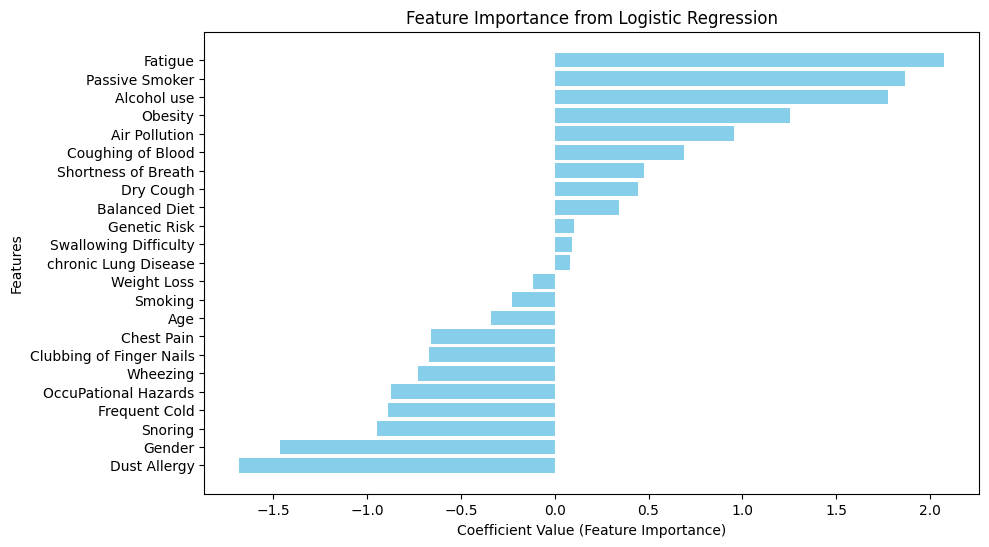

In [51]:


# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')

# Adding labels and title
plt.xlabel('Coefficient Value (Feature Importance)')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # To display the largest importance on top
plt.show()


## Feature Importance Reflection:

The top 4 most important features for predicting Level of lung cancer are, Fatigue, Passive Smoker, Alcohol Use and Obesity. Gender also plays an important role in predciting which leve a patient falls under. 


## Random Forest Classifier Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

#Instantiate rf model
rf_class = RandomForestClassifier(n_estimators=100, random_state=22)

#Fit model
rf_class.fit(X_train,y_train)

#Make Predictions

y_pred = rf_class.predict(X_test)

In [90]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.992

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       0.97      1.00      0.99        67
         2.0       1.00      0.98      0.99        88

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250


Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  2 86]]


In [92]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_class.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                     feature  importance
9                    Obesity    0.135047
13         Coughing of Blood    0.110327
17                  Wheezing    0.075157
11            Passive Smoker    0.069713
14                   Fatigue    0.064579
3                Alcohol use    0.047795
19  Clubbing of Finger Nails    0.046447
18     Swallowing Difficulty    0.046249
16       Shortness of Breath    0.045867
8              Balanced Diet    0.044389
10                   Smoking    0.039195
4               Dust Allergy    0.034908
22                   Snoring    0.033377
2              Air Pollution    0.031662
20             Frequent Cold    0.029020
5       OccuPational Hazards    0.028608
6               Genetic Risk    0.028518
15               Weight Loss    0.026629
12                Chest Pain    0.019606
21                 Dry Cough    0.016015
7       chronic Lung Disease    0.014171
0                        Age    0.007025
1                     Gender    0.00

In [94]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


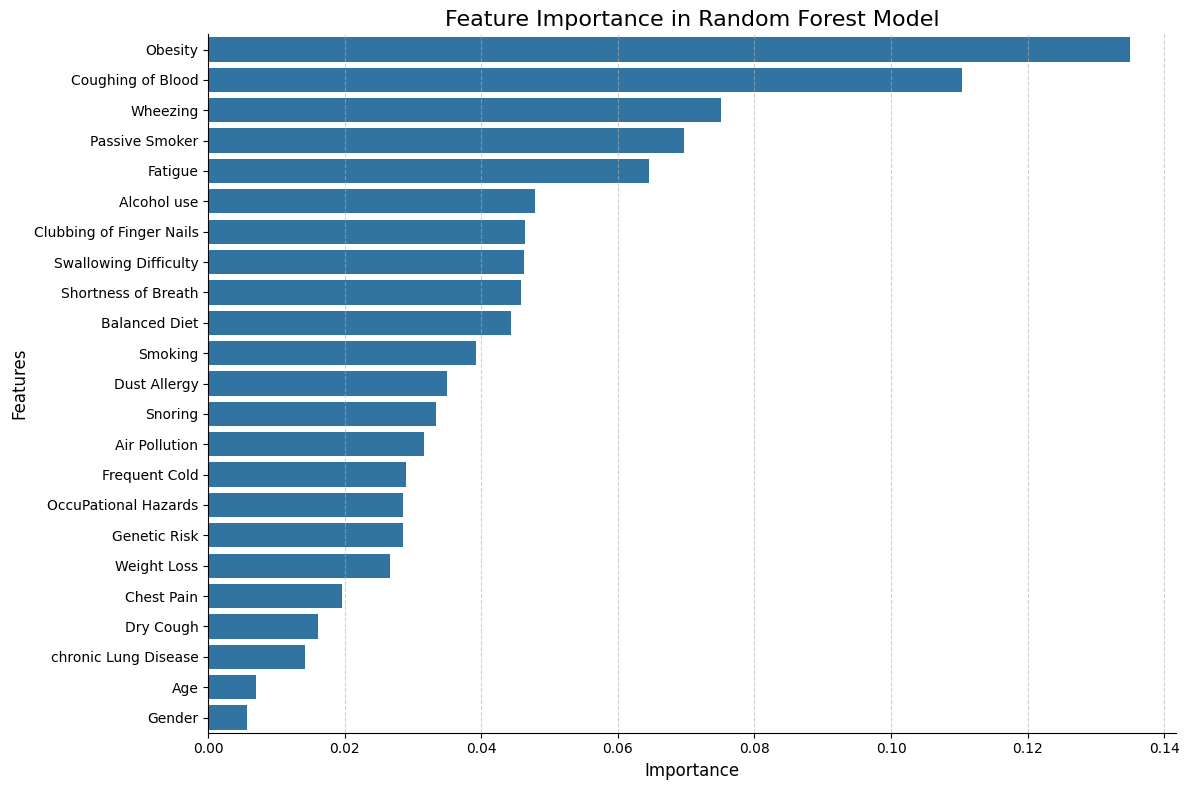

In [96]:
import seaborn as sns

# Assuming you've already created your Random Forest model and have the feature_importance DataFrame


# Create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the feature importance
sns.barplot(x='importance', y='feature', data=feature_importance, ax=ax)

# Customize the plot
ax.set_title("Feature Importance in Random Forest Model", fontsize=16)
ax.set_xlabel("Importance", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

# Remove top and right spines
sns.despine()

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout and display
plt.tight_layout()
plt.show()

## Reflection on Feature Imporance of Random Forest.

This model gives more importance to Obestity, Coughing of Blood and Wheezing than the Logistic regression model.

## Hyperparameter Tunning on RF classifier using RandomizedSearch

In [98]:
from scipy.stats import randint

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),      # Number of trees in the forest
    'max_depth': randint(10, 50),           # Maximum depth of the trees
    'min_samples_split': randint(2, 10),    # Minimum samples to split an internal node
    'min_samples_leaf': randint(1, 10),     # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt'],       # Number of features to consider for best split
    'bootstrap': [True, False]              # Whether to bootstrap samples
}

In [99]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_class, param_distributions=param_dist, 
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, 
                                   random_state=42, scoring='accuracy')

# Fit the randomized search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   0.0s[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   0.0s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   0.0s[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.0s[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.0s


[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=22),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1361f5520>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x135e75490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1376ce570>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x135941f70>},
                   random_state=42, scoring='accuracy', verbose=2)

In [100]:
#Finding best hyperparameters 
# Find the best hyperparameters
best_params = random_search.best_params_
print(f"Best hyperparameters from RandomizedSearch: {best_params}")

# Use the best model to predict on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Best hyperparameters from RandomizedSearch: {'bootstrap': False, 'max_depth': 39, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 376}
Test Accuracy: 1.0000
Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  0 88]]


## Building Random forest classifier model based on best hyperparameters

In [101]:


rf_best = RandomForestClassifier(**best_params, random_state=22)


# Train the model
rf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Test Accuracy: 1.0000
Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  0 88]]


In [102]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       1.00      1.00      1.00        67
         2.0       1.00      1.00      1.00        88

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## Strong suspicion that model is overfitting

In [103]:
from sklearn.model_selection import cross_val_score

rf_best = RandomForestClassifier(**best_params, random_state=42)
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")


Cross-validation scores: [1.         1.         0.99333333 0.99333333 0.99333333]
Mean cross-validation accuracy: 0.9960


## Learning curves: Doing this to visualize the relationship between training and validation performance. This will help identify overfitting patterns

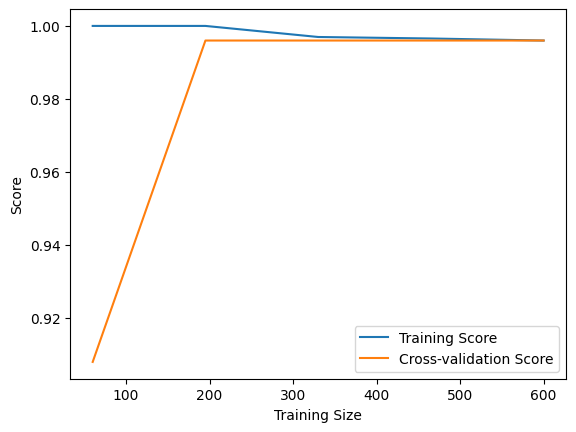

In [104]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(rf_best, X_train, y_train, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


## Adjusting hyperparameters to reduce overfitting.

Best hyperparameters from RandomizedSearch: {'bootstrap': False, 'max_depth': 39, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 376}

In [109]:
#Instantiate rf model
rf_class2 = RandomForestClassifier(n_estimators=200, max_depth=10, bootstrap=False, min_samples_leaf=3, min_samples_split=9, max_features='sqrt', random_state=22)

#Fit model
rf_class2.fit(X_train,y_train)

#Make Predictions

y_pred = rf_class2.predict(X_test)

In [110]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       1.00      1.00      1.00        67
         2.0       1.00      1.00      1.00        88

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


Confusion Matrix:
[[95  0  0]
 [ 0 67  0]
 [ 0  0 88]]


 ## Conclusion:


 